# Airline Passenger Satisfaction - Voting Classifier
----
## Load models

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = KNeighborsClassifier(n_neighbors = 5)
model2 = DecisionTreeClassifier(max_depth = 13)
model3 = make_pipeline(StandardScaler(), SVC(gamma=0.03, C=0.8))
model4 = MLPClassifier(alpha=0.001, learning_rate_init=0.005, random_state=11)
model5 = make_pipeline(StandardScaler(), SGDClassifier(alpha=0.01))
ensemble = RandomForestClassifier(max_depth=20)


## Load data

In [2]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb

## Create Voting Classifier

Mean Average Error (train): 0.037842623960579
Mean Average Error (validation): 0.046889436402833384


<module 'matplotlib.pyplot' from '/home/ivankras/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

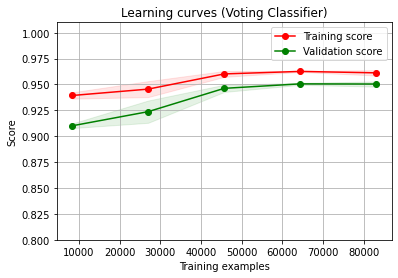

In [4]:
from sklearn.ensemble import VotingClassifier

classifier = VotingClassifier(
    estimators=[
        ('knn', model1), ('dt', model2), ('svc', model3),
        ('mlp', model4), ('sgd', model5), ('rf', ensemble)
    ],
    voting='hard',
    n_jobs=-1
)

classifier = classifier.fit(X_train, y_train)

In [ ]:
train_error, val_error = get_mae(classifier, X_train, X_valid, y_train, y_valid)

print(f'Mean Average Error (train): {train_error}')
print(f'Mean Average Error (validation): {val_error}')

plot_learning_curve(classifier, 'Learning curves (Voting Classifier)', X_train, y_train, ylim=(0.8, 1.01), n_jobs=-1)